<h1 align='center'> 영상처리 프로그래밍 실습 3</h1>

<h6 align='right'> 2025. 3. 27. </h6>

<div class="alert alert-block alert-info">
    
- 파일 이름에서 00000000을 자신의 학번으로, name을 자신의 이름으로 수정하세요.

- 다음 줄에 자신의 이름, 학번, 학과(전공)을 적으세요.

* 이름:  이선재 &nbsp;&nbsp;          학번:  20227123  &nbsp;&nbsp;         학과(전공):  빅데이터
    
</div>

- JupyterLab 문서의 최신 버전은 [JupyterLab Documentation](https://jupyterlab.readthedocs.io/en/stable/index.html#/)을  참고하라

- Markdown은 [Markdown Guide](https://www.markdownguide.org/)를 참고하라.
- [Markdown Cheat Sheet](https://www.markdownguide.org/cheat-sheet/)

* 제출 마감: 4월 2일 (수) 오후 10:00까지 최종본을 SmartLEAD제출


In [6]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import sys

print("Python version", sys.version)
print("OpenCV version", cv2.__version__)
print("NumPy version", np.__version__)

Python version 3.12.7 | packaged by Anaconda, Inc. | (main, Oct  4 2024, 13:17:27) [MSC v.1929 64 bit (AMD64)]
OpenCV version 4.11.0
NumPy version 1.26.4


## 문제 1. 기본 이미지 읽기와 표시
* 목표: OpenCV로 이미지 파일을 읽고 창에 표시하는 기본 동작 이해

### 1.1 
OpenCV의 imread() 함수를 이용해서 tree-1.jpg 파일을 읽고, 화면에 표시하는 프로그램을 작성하라. 



In [ ]:
img = cv2.imread("tree-1.jpg")

cv2.imshow("Tree 1",img)
cv2.waitKey(0)
cv2.destroyAllWindows("Tree 1")

SystemError: <built-in function destroyAllWindows> returned NULL without setting an exception

: 

### namedWindows 함수 사용하기

In [ ]:
# "Tree 1"이라는 이름의 창을 미리 생성
cv2.namedWindow("Tree 1")
img = cv2.imread("tree-1.jpg")
cv2.imshow("Tree 1", img)
cv2.waitKey(0)
cv2.destroyWindow("Tree 1")

### 1.2:
namedWindow 함수를 사용하는 경우에 윈도우 크기가 작은 이유를 알아 보고, namedWindow 함수를 사용했을 때도 윈도우 크기가 영상의 크기에 맞게 표시되도록 프로그램을 수정하라.

In [ ]:
# 찾고자하는 함수를 찾는 법
# 더 정확히는 cv2 모듈에 정의된 모든 속성 중에서 이름에 "WINDOW_"라는 문자열이 포함된 것들을 출력하는 코드

# 하나하나 살펴보면
# dir() 함수는 주어진 객체(여기서는 cv2 모듈)의 유효한 속성 및 메서드 이름을 리스트로 반환
# 즉, dir(cv2)는 OpenCV 모듈에 포함된 모든 변수, 함수, 클래스 등의 이름을 반환

for e in dir(cv2):
    if "WINDOW_" in e:
        print(e)

WINDOW_AUTOSIZE
WINDOW_FREERATIO
WINDOW_FULLSCREEN
WINDOW_GUI_EXPANDED
WINDOW_GUI_NORMAL
WINDOW_KEEPRATIO
WINDOW_NORMAL
WINDOW_OPENGL


In [ ]:
cv2.WINDOW_NORMAL

# 기본적으로 cv2.namedWindow() 없이 cv2.imshow()만 사용 할 경우
# 창이 자동 생성되며, 기본 속성은 cv2.WINDOW_AUTOSIZE로 설정됩니다.
# 하지만, cv2.namedWindow()는 속성을 명시적으로 설정 할 수 있습니다.

# 예를들어, WINDOW_NORMAL는 창 크기가 이미지에 맞춰 초기화되지만, 사용자가 조정 가능하므로 창 열림 후 크기가 달라질 수 있음

height, width = img.shape[:2]

cv2.namedWindow("Tree 1", cv2.WINDOW_NORMAL)
img = cv2.imread("tree-1.jpg")
cv2.imshow("Tree 1", img)
cv2.resizeWindow("Tree 1", width, height) # 영상 크기에 맞게 설정

cv2.waitKey(0)
cv2.destroyWindow("Tree 1")

### 1.3
이 프로그램에서 waitKey(0)의 역할을 설명하라.

---
cv2.waitKey(0)는 OpenCV에서 키보드 입력을 대기하는 함수로, GUI 창을 띄운 상태에서 사용자 입력을 처리 프로그램의 흐름을 제어하는 데 자주 사용됩니다.   
delay 값에 따라 동작이 달라지기도 합니다. delay가 0이면 무한 대기. 키보드 입력이 있을 때까지 프로그램이 멈춰 있습니다.  
delay가 0 이상일 때 지정된 시간(밀리초 단위) 동안 키 입력을 기다림. 시간이 지나면 키 입력 여부와 상관없이 진행합니다.

| **매개변수 (`delay`)** | **역할**                          | **반환값**                  | **주요 사용 사례**            |
|-----------------------|-----------------------------------|----------------------------|------------------------------|
| `0`                   | 무한 대기 (키 입력까지 멈춤)      | 눌린 키의 ASCII 코드       | 이미지 표시 후 사용자 입력 대기 |
| 양수 (예: `50`)       | 지정된 시간(ms) 동안 대기 후 진행 | 키 입력 시 ASCII 코드, 없으면 `-1` | 동영상 프레임 딜레이, 애니메이션 |
| 음수 (비추천)         | 보통 무한 대기처럼 동작           | 눌린 키의 ASCII 코드       | 사용하지 않는 것이 좋음       |

### 추가 설명
- **`cv2.waitKey()`**는 OpenCV 창에서 키보드 이벤트를 처리하며, GUI 업데이트를 보장하는 역할도 합니다.
- 예: `cv2.waitKey(50)`는 50ms 동안 키 입력을 기다리고, 없으면 다음 코드로 넘어갑니다.

### [심화] 1.4
앞에서 작성한 프로그램에서 cv2.imread 함수로 이미지를 읽을 때, 지정한 파일('tree-1.jpg')이 존재하지 않으면 오류가 발생한다. 파일이 없는 경우를 대비해 프로그램이 비정상 종료되지 않도록 오류 메시지를 출력하는 기능을 추가하라.`

-----
Q1 : 파일이 없는 경우를 어떻게 확인해?  
A1 : ```if img is None:``` 를 사용하면 확인이 가능함  
  
Q2 : cv2.destroyWindow("Tree 1") 를 안써도 exit()만 써도 상관 없지 않아?  
A2 : 지금은 문제가 없을 거야. 하지만, 잠재적인 문제점이 발생해. exit()는 Python 프로그램을 즉시 종료하며, 모든 실행 중인 프로세스를 중단해 그러니  "Tree 1" 창은 명시적으로 닫히지 않고 메모리에 남아 있을 수 있어. 그래서 정리하면, 리소스 정리 누락, 운영 체제 의존성, 창이 화면에 남아 있을 가능성 등이 있어

In [ ]:
# if문으로 사용하는 코드

# 창 생성
cv2.namedWindow("Tree 1", cv2.WINDOW_NORMAL)

# 이미지 읽기
img = cv2.imread("tree-1.jpg")

# 파일 읽기 실패 시 오류 메시지 출력 및 종료
if img is None:
    print("오류: 'tree-1.jpg' 파일을 찾을 수 없거나 읽을 수 없습니다.")
    cv2.destroyWindow("Tree 1")  # 이미 생성된 창 닫기
    exit()  # 프로그램 종료

# 이미지 표시
cv2.imshow("Tree 1", img)

# 키 입력 대기
cv2.waitKey(0)

# 창 닫기
cv2.destroyWindow("Tree 1")

In [ ]:
# try문으로 만든 코드

import cv2

try:
    # 창 생성
    cv2.namedWindow("Tree 1", cv2.WINDOW_NORMAL)

    # 이미지 읽기
    img = cv2.imread("tree-1.jpg")
    if img is None:
        raise FileNotFoundError("'tree-1.jpg' 파일을 찾을 수 없거나 읽을 수 없습니다.")

    # 이미지 표시
    cv2.imshow("Tree 1", img)

    # 키 입력 대기
    cv2.waitKey(0)

except FileNotFoundError as e:
    # 파일 관련 오류 처리
    print(f"오류: {e}")
    cv2.destroyWindow("Tree 1")  # 창 정리
    exit()

except Exception as e:
    # 기타 예외 처리
    print(f"예상치 못한 오류 발생: {e}")
    cv2.destroyWindow("Tree 1")  # 창 정리
    exit()

else:
    # 예외가 발생하지 않은 경우 창 닫기
    cv2.destroyWindow("Tree 1")

## 문제 2.
 * 목표: 두 이미지 간의 간단한 전환 효과 이해
   
### 2.1
OpenCV의 imread() 함수를 이용해서 tree-1.jpg와 tree-2.jpg를 읽고, 가중치 $\alpha$를 1부터 0까지 0.01 간격으로 변경해 가면서, 두 영상의 weighted sum을 차례로 구하고 화면에 표시하는 프로그램을 작성하라. 

단, 영상과 영상 사이의 디스플레이 간격은 0.05초로 설정하라.


In [ ]:
import cv2
import numpy as np

try:
    # 창 생성
    cv2.namedWindow("Blending", cv2.WINDOW_AUTOSIZE)

    # 이미지 읽기
    tree1 = cv2.imread("tree-1.jpg")
    if tree1 is None:
        raise FileNotFoundError("'tree-1.jpg' 파일을 찾을 수 없습니다.")

    tree2 = cv2.imread("tree-2.jpg")
    if tree2 is None:
        raise FileNotFoundError("'tree-2.jpg' 파일을 찾을 수 없습니다.")

    # 블렌딩 애니메이션
    for a in np.arange(1.0, 0, -0.01):
        blended = cv2.addWeighted(tree1, a, tree2, 1 - a, 0)  # 가중치 합성
        # blended_rgb = cv2.cvtColor(blended, cv2.COLOR_BGR2RGB)  # RGB 변환 (필요 시 주석 해제)
        cv2.imshow("Blending", blended)  # BGR 그대로 표시
        # q를 누르면 빠져나가게 만듬
        cv2.waitKey(50)

    # 최종 이미지 표시 후 종료
    cv2.waitKey(0)

except FileNotFoundError as e:
    # 파일 관련 오류 처리
    print(f"오류: {e}")
    cv2.destroyWindow("Blending")  # 올바른 창 이름으로 정리
    exit()

except Exception as e:
    # 기타 예외 처리
    print(f"예상치 못한 오류 발생: {e}")
    cv2.destroyWindow("Blending")
    exit()

finally:
    # 모든 경우 창 정리
    cv2.destroyAllWindows()
    print("끝")

끝


### [심화] 2.2 

문제 2.1에서 만든 프로그램 그림에서 발생할 수 있는 예외적인 상황에 대해서 생각해 보고, 이런 상황을 처리하도록 프로그램을 수정하라.



In [ ]:
import cv2
import numpy as np

try:
    # 창 생성
    cv2.namedWindow("Blending", cv2.WINDOW_AUTOSIZE)

    # 이미지 읽기
    tree1 = cv2.imread("tree-1.jpg")
    if tree1 is None:
        raise FileNotFoundError("'tree-1.jpg' 파일을 찾을 수 없습니다.")

    tree2 = cv2.imread("tree-2.jpg")
    if tree2 is None:
        raise FileNotFoundError("'tree-2.jpg' 파일을 찾을 수 없습니다.")

    # 이미지 크기 확인
    print(f"tree-1 크기: {tree1.shape}")  # (높이, 너비, 채널)
    print(f"tree-2 크기: {tree2.shape}")

    # 크기 불일치 시 조정
    if tree1.shape != tree2.shape:
        print("이미지 크기가 다릅니다. tree-2를 tree-1 크기에 맞게 조정합니다.")
        tree2 = cv2.resize(tree2, (tree1.shape[1], tree1.shape[0]))  # 너비, 높이 순

    # 블렌딩 애니메이션
    for a in np.arange(1.0, 0, -0.01):
        blended = cv2.addWeighted(tree1, a, tree2, 1 - a, 0)  # 가중치 합성
        # blended_rgb = cv2.cvtColor(blended, cv2.COLOR_BGR2RGB)  # RGB 변환 (필요 시 주석 해제)
        cv2.imshow("Blending", blended)  # BGR 그대로 표시
        # q를 누르면 빠져나가게 만듬
        if cv2.waitKey(50) == ord('q'):
            break

    # 최종 이미지 표시 후 종료
    cv2.waitKey(0)

except FileNotFoundError as e:
    # 파일 관련 오류 처리
    print(f"오류: {e}")
    cv2.destroyWindow("Blending")  # 올바른 창 이름으로 정리
    exit()

except Exception as e:
    # 기타 예외 처리
    print(f"예상치 못한 오류 발생: {e}")
    cv2.destroyWindow("Blending")
    exit()

finally:
    # 모든 경우 창 정리
    cv2.destroyAllWindows()
    print("끝")

tree-1 크기: (426, 640, 3)
tree-2 크기: (426, 640, 3)
끝


## 문제 3.
 * 목표: 네 개 이미지 간 순환 전환 구현

OpenCV의 imread() 함수를 이용해서 tree-1.jpg, tree-2.jpg, tree-3.jpg,  tree-4.jpg 네 파일을 읽고, 가중치 $\alpha$를 1부터 0까지 0.01 간격으로 변경해 가면서, 다음 () 안의 두 영상의 weighted sum을 차례로 구하고 화면에 표시하는 프로그램을 작성하라. 

- (tree-1.jpg, tree-2.jpg) --> (tree-2.jpg, tree-3.jpg) --> (tree-3.jpg, tree-4.jpg) --> (tree-4.jpg, tree-1.jpg)

단, 영상과 영상 사이의 디스플레이 간격은 0.05초로 설정하라.


In [3]:
import cv2
import numpy as np

try:
    # 창 생성
    cv2.namedWindow("Blending", cv2.WINDOW_AUTOSIZE)

    # 이미지 읽기
    tree1 = cv2.imread("tree-1.jpg")
    if tree1 is None:
        raise FileNotFoundError("'tree-1.jpg' 파일을 찾을 수 없습니다.")

    tree2 = cv2.imread("tree-2.jpg")
    if tree2 is None:
        raise FileNotFoundError("'tree-2.jpg' 파일을 찾을 수 없습니다.")
    
    tree3 = cv2.imread("tree-3.jpg")
    if tree3 is None:
        raise FileNotFoundError("'tree-3.jpg' 파일을 찾을 수 없습니다.")
    
    tree4 = cv2.imread("tree-4.jpg")
    if tree4 is None:
        raise FileNotFoundError("'tree-4.jpg' 파일을 찾을 수 없습니다.")

    # 모든 이미지 크기 조정 (tree1 기준)
    print(f"tree-1 크기: {tree1.shape}")
    print(f"tree-2 크기: {tree2.shape}")
    print(f"tree-3 크기: {tree3.shape}")
    print(f"tree-4 크기: {tree4.shape}")

    if tree1.shape != tree2.shape or tree1.shape != tree3.shape or tree1.shape != tree4.shape:
        print("이미지 크기가 다릅니다. 모든 이미지를 tree-1 크기에 맞게 조정합니다.")
        tree2 = cv2.resize(tree2, (tree1.shape[1], tree1.shape[0]))
        tree3 = cv2.resize(tree3, (tree1.shape[1], tree1.shape[0]))
        tree4 = cv2.resize(tree4, (tree1.shape[1], tree1.shape[0]))

    # 블렌딩 함수 정의
    for a in np.arange(1.0, 0, -0.01):
        blended = cv2.addWeighted(tree1, a, tree2, 1 - a, 0)
        cv2.imshow("Blending", blended.astype(np.uint8))
        if cv2.waitKey(50) == ord('q'):
            break

    for a in np.arange(1.0, 0, -0.01):
        blended = cv2.addWeighted(tree2, a, tree3, 1 - a, 0)
        cv2.imshow("Blending", blended.astype(np.uint8))
        if cv2.waitKey(50) == ord('q'):
            break

    for a in np.arange(1.0, 0, -0.01):
        blended = cv2.addWeighted(tree3, a, tree4, 1 - a, 0)
        cv2.imshow("Blending", blended.astype(np.uint8))
        if cv2.waitKey(50) == ord('q'):
            break

    for a in np.arange(1.0, 0, -0.01):
        blended = cv2.addWeighted(tree4, a, tree1, 1 - a, 0)
        cv2.imshow("Blending", blended.astype(np.uint8))
        if cv2.waitKey(50) == ord('q'):
            break


    # 최종 이미지 표시 후 종료
    cv2.imshow("Blending", tree1)
    cv2.waitKey(0)

except FileNotFoundError as e:
    # 파일 관련 오류 처리
    print(f"오류: {e}")
    cv2.destroyWindow("Blending")
    exit()

except KeyboardInterrupt as e:
    # 'q'로 중단 시 처리
    print(f"{e}")
    cv2.destroyWindow("Blending")
    exit()

except Exception as e:
    # 기타 예외 처리
    print(f"예상치 못한 오류 발생: {e}")
    cv2.destroyWindow("Blending")
    exit()

finally:
    # 모든 경우 창 정리
    cv2.destroyAllWindows()
    print("끝")

tree-1 크기: (426, 640, 3)
tree-2 크기: (426, 640, 3)
tree-3 크기: (426, 640, 3)
tree-4 크기: (426, 640, 3)
끝


### 3.1 반복 코드의 가독성 및 유지 보수성 향성
 * 위 코드에서 같은 일이 몇 번 반복되나? 어디서 반복되는지 찾아보자.
 * 가독성을 높이기 위해서 위의 프로그램을 수정해 보자.

In [7]:
import cv2
import numpy as np


# 블렌딩 함수 정의
def blend_images(img1, img2, delay=50):
    for a in np.arange(1.0, 0, -0.01):
        blended = cv2.addWeighted(img1, a, img2, 1 - a, 0)
        cv2.imshow("Blending", blended)
        cv2.waitKey(delay)

def load_image(img):
    tree = cv2.imread(img)
    if tree is None:
        return FileNotFoundError(tree)
    return tree
        
try:
    # 창 생성
    cv2.namedWindow("Blending", cv2.WINDOW_AUTOSIZE)

    trees = [load_image(f'tree-{n}.jpg') for n in range(1,5)]

    for n in range(4):
        blend_images(trees[n], trees[(n+1)%4])

    cv2.waitKey(0)

except FileNotFoundError as e:
    # 파일 관련 오류 처리
    print(f"오류: {e}")
    cv2.destroyWindow("Blending")
    exit()

except KeyboardInterrupt as e:
    # 'q'로 중단 시 처리
    print(f"{e}")
    cv2.destroyWindow("Blending")
    exit()

except Exception as e:
    # 기타 예외 처리
    print(f"예상치 못한 오류 발생: {e}")
    cv2.destroyWindow("Blending")
    exit()

finally:
    # 모든 경우 창 정리
    cv2.destroyAllWindows()
    print("끝")

끝


In [4]:
lst = []
for n in range(1, 6, 2):
    lst.append(n)

lst

[1, 3, 5]

In [ ]:
# 리스트 컴프리헨션(List Comprehension)
# Python에서 리스트를 간결하게 생성하는 방법 중 하나로, 반복문과 조건문을 한 줄에 작성해 리스트를 만드는 구문
lst = [n for n in range(1, 6, 2)]
lst

[1, 3, 5]

### 문제 4: 

OpenCV의 waitKey 함수를 이용하여 예제 1에서 영상이 변화 과정을 반수동으로 변경할 수 있도록 프로그램을 수정하라.

단, 입력한 키에 따른 동작은 다음과 같다.

- '1': $\alpha = 0. \rightarrow 1.00$,  tree-1 $\rightarrow$ tree-2, (tree-2에서 정지)
- '2': $\alpha = 0. \rightarrow 1.00$,  tree-2 $\rightarrow$ tree-3, (tree-3에서 정지)
- '3': $\alpha = 0. \rightarrow 1.00$,  tree-3 $\rightarrow$ tree-4, (tree-4에서 정지)
- '4': $\alpha = 0. \rightarrow 1.00$,  tree-4 $\rightarrow$ tree-1, (tree-1에서 정지)
- 'q': 프로그램 종료



### 문제 7.

OpenCV의 trackbar를 사용하여 예제 1에서 영상이 변화 과정을 수동으로 변경할 수 있도록 프로그램을 수정하라.

단, Trackbar의 범위를 0부터 400까지 설정하고, trackbar에서 1이 변하면 $\alpha$ 값이 0.01이 변하도록 변환하라. trackbar의 변환 범위는 다음과 같다.

- Trackbar $= 0 \rightarrow 100$:   $\alpha = 0. \rightarrow 1.00$,  tree-1 $\rightarrow$ tree-2
- Trackbar $= 100 \rightarrow 200$: $\alpha = 0. \rightarrow 1.00$,  tree-2 $\rightarrow$ tree-3
- Trackbar $= 200 \rightarrow 300$: $\alpha = 0. \rightarrow 1.00$,  tree-3 $\rightarrow$ tree-4
- Trackbar $= 300 \rightarrow 400$: $\alpha = 0. \rightarrow 1.00$,  tree-4 $\rightarrow$ tree-1

그리고 'q'를 누르면 프로그램이 종료되어야 한다.

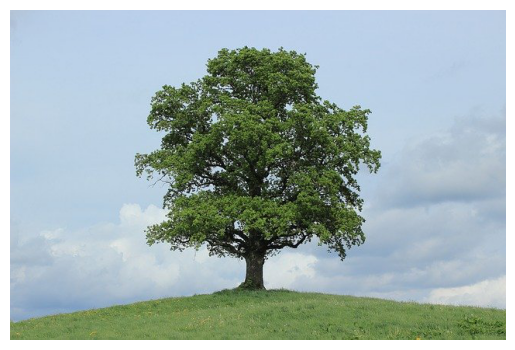

In [ ]:
img = mpimg.imread('tree-1.jpg')
plt.imshow(img)
plt.axis('off')
plt.show()

In [4]:
img = cv2.imread('tree-1.jpg')

In [ ]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [ ]:
img.shape, img_gray.shape

((426, 640, 3), (426, 640))

(-0.5, 639.5, 425.5, -0.5)

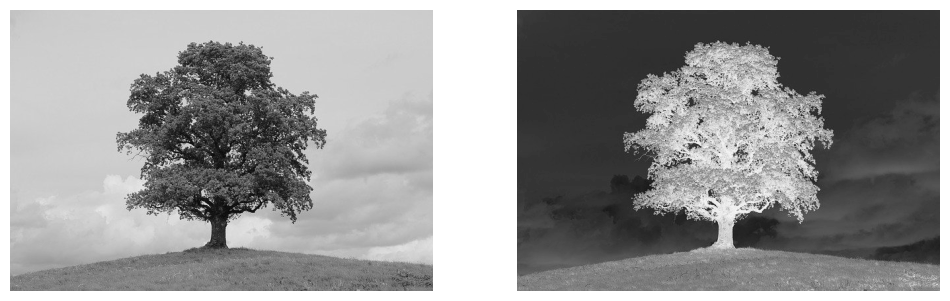

In [ ]:
plt.figure(figsize=(12,8))
plt.subplot(121)
plt.imshow(img_gray, cmap='gray')
plt.axis('off')
plt.subplot(122)
plt.imshow(255-img_gray, cmap='gray')
plt.axis('off')

(-0.5, 639.5, 425.5, -0.5)

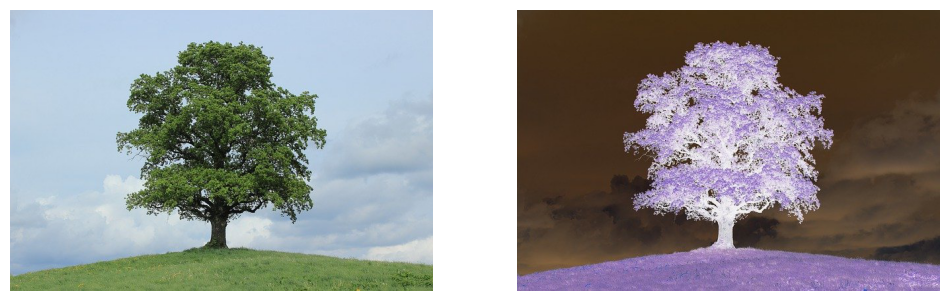

In [ ]:
plt.figure(figsize=(12,8))
plt.subplot(121)
plt.imshow(img[:,:,::-1])
plt.axis('off')
plt.subplot(122)
plt.imshow(255-img[:,:,::-1], cmap='gray')
plt.axis('off')

In [ ]:
def onMouseColorGray(event, x, y, flags, param):
    # local namespace
    if event == cv2.EVENT_RBUTTONUP:
        cv2.imshow(winName, img_gray)
    elif event == cv2.EVENT_LBUTTONUP:
        cv2.imshow(winName, img)

# main body namespace
img = cv2.imread('tree-1.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
winName = 'color & gray'
cv2.imshow(winName, img)
cv2.setMouseCallback(winName, onMouseColorGray)
while cv2.waitKey(0) != ord('q'):
    pass
cv2.destroyAllWindows()


In [ ]:
cv2dir = dir(cv2)
[e for e in cv2dir if 'EVENT' in e]

['EVENT_FLAG_ALTKEY',
 'EVENT_FLAG_CTRLKEY',
 'EVENT_FLAG_LBUTTON',
 'EVENT_FLAG_MBUTTON',
 'EVENT_FLAG_RBUTTON',
 'EVENT_FLAG_SHIFTKEY',
 'EVENT_LBUTTONDBLCLK',
 'EVENT_LBUTTONDOWN',
 'EVENT_LBUTTONUP',
 'EVENT_MBUTTONDBLCLK',
 'EVENT_MBUTTONDOWN',
 'EVENT_MBUTTONUP',
 'EVENT_MOUSEHWHEEL',
 'EVENT_MOUSEMOVE',
 'EVENT_MOUSEWHEEL',
 'EVENT_RBUTTONDBLCLK',
 'EVENT_RBUTTONDOWN',
 'EVENT_RBUTTONUP']

In [5]:
def onMouseColorGrayInvert(event, x, y, flags, param):
    # local namespace
    global gray_mode, color_mode
    if event == cv2.EVENT_LBUTTONUP:
        if gray_mode == 'NORMAL':
            cv2.imshow(winName, img_gray_inv)
            gray_mode = 'INVERT'
        elif gray_mode == 'INVERT':
            cv2.imshow(winName, img_gray)
            gray_mode = 'NORMAL'
    elif event == cv2.EVENT_RBUTTONUP:
        if color_mode == 'NORMAL':
            cv2.imshow(winName, img_inv)
            color_mode = 'INVERT'
        elif color_mode == 'INVERT':
            cv2.imshow(winName, img)
            color_mode = 'NORMAL'

# main body namespace
img = cv2.imread('tree-1.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_inv = 255 - img
img_gray_inv = 255 - img_gray

color_mode = 'NORMAL'
gray_mode = 'NORMAL'

winName = 'color & gray'
cv2.imshow(winName, img)
cv2.setMouseCallback(winName, onMouseColorGrayInvert)
while cv2.waitKey(0) != ord('q'):
    pass
cv2.destroyAllWindows()


KeyboardInterrupt: 

### 문제 6: 

OpenCV의 waitKey 함수를 이용하여 예제 1에서 영상이 변화 과정을 반수동으로 변경할 수 있도록 프로그램을 수정하라.

단, 입력한 키에 따른 동작은 다음과 같다.

- '1': $\alpha = 0. \rightarrow 1.00$,  tree-1 $\rightarrow$ tree-2, (tree-2에서 정지)
- '2': $\alpha = 0. \rightarrow 1.00$,  tree-2 $\rightarrow$ tree-3, (tree-3에서 정지)
- '3': $\alpha = 0. \rightarrow 1.00$,  tree-3 $\rightarrow$ tree-4, (tree-4에서 정지)
- '4': $\alpha = 0. \rightarrow 1.00$,  tree-4 $\rightarrow$ tree-1, (tree-1에서 정지)
- 'q': 프로그램 종료



### 문제 7.

OpenCV의 trackbar를 사용하여 예제 1에서 영상이 변화 과정을 수동으로 변경할 수 있도록 프로그램을 수정하라.

단, Trackbar의 범위를 0부터 400까지 설정하고, trackbar에서 1이 변하면 $\alpha$ 값이 0.01이 변하도록 변환하라. trackbar의 변환 범위는 다음과 같다.

- Trackbar $= 0 \rightarrow 100$:   $\alpha = 0. \rightarrow 1.00$,  tree-1 $\rightarrow$ tree-2
- Trackbar $= 100 \rightarrow 200$: $\alpha = 0. \rightarrow 1.00$,  tree-2 $\rightarrow$ tree-3
- Trackbar $= 200 \rightarrow 300$: $\alpha = 0. \rightarrow 1.00$,  tree-3 $\rightarrow$ tree-4
- Trackbar $= 300 \rightarrow 400$: $\alpha = 0. \rightarrow 1.00$,  tree-4 $\rightarrow$ tree-1

그리고 'q'를 누르면 프로그램이 종료되어야 한다.

In [3]:
def onMouseClick(event, x, y, flags, param):
    global pt1, pt2, img_a
    if event == cv2.EVENT_LBUTTONUP:
        pt1 = x, y
        pt2 = pt1 + rect
        img_a = img.copy()
        cv2.rectangle(img_a, pt1, pt2, white, cv2.LINE_4)
        cropped_img = img[pt1[1]:pt2[1], pt1[0]:pt2[0],:]
        cv2.imshow("Cropped", cropped_img)
        cv2.imshow("Image", img_a)

white = (255, 255, 255)
img = cv2.imread("bird.png")

pt1 = np.array([30, 30]) # (x, y)
rect =  np.array([300, 200]) # (x, y)
pt2 = pt1 + rect

img_a = img.copy()
cv2.rectangle(img_a, pt1, rect, white, cv2.LINE_4)

cropped_img = img[pt1[0]:pt1[0]+rect[1],pt1[1]:pt1[1]+rect[0],:]
cv2.imshow("Cropped", cropped_img)
cv2.imshow("Image", img_a)

cv2.setMouseCallback("Image", onMouseClick)
while cv2.waitKey(0) != ord('q'):
    pass


cv2.destroyAllWindows()

In [ ]:
%matplotlib qt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpl
from matplotlib.patches import Rectangle

# 전역 변수
pt1 = np.array([30, 30])  # 초기 좌표 (x, y)
rect = np.array([300, 200])  # 사각형 크기 (width, height)
img = mpl.imread("bird.png")
img_a = img.copy()


# 마우스 클릭 이벤트 처리 함수
def onMouseClick(event):
    global pt1, pt2, img_a_rgb
    if event.button == 1:  # 왼쪽 버튼 클릭
        pt1 = np.array([int(event.xdata), int(event.ydata)])
        pt2 = pt1 + rect
        img_a = img.copy()  # 원본 복사
        cv2.rectangle(img_a, tuple(pt1), tuple(pt2), (255, 255, 255), thickness=4)
        img_a_rgb = cv2.cvtColor(img_a, cv2.COLOR_BGR2RGB)
        
        # 잘린 이미지
        cropped_img = img[pt1[1]:pt2[1], pt1[0]:pt2[0], :]
        cropped_img_rgb = cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB)
        
        # Matplotlib로 업데이트
        ax1.imshow(img_a_rgb)
        ax1.patches.clear()  # 이전 사각형 제거
        ax1.add_patch(Rectangle(pt1, rect[0], rect[1], fill=False, edgecolor='white', linewidth=2))
        ax2.imshow(cropped_img_rgb)
        plt.draw()

# 초기 사각형 그리기
cv2.rectangle(img_a, tuple(pt1), tuple(pt2), (255, 255, 255), thickness=4)
img_a_rgb = cv2.cvtColor(img_a, cv2.COLOR_BGR2RGB)
cropped_img = img[pt1[1]:pt2[1], pt1[0]:pt2[0], :]
cropped_img_rgb = cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB)

# Matplotlib figure 설정
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.set_title("Image")
ax2.set_title("Cropped")
ax1.imshow(img_a_rgb)
ax1.add_patch(Rectangle(pt1, rect[0], rect[1], fill=False, edgecolor='white', linewidth=2))
ax2.imshow(cropped_img_rgb)

# 마우스 이벤트 연결
#fig.canvas.mpl_connect('button_release_event', onMouseClick)

# 'q'로 종료하기 위한 별도 처리 (Matplotlib는 cv2.waitKey와 다르게 동작)
print("Press 'q' in the Jupyter cell or interrupt the kernel to exit.")
plt.show()

NameError: name 'cv2' is not defined

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.patches import Rectangle

# Qt 백엔드 설정
%matplotlib qt

# 전역 변수
pt1 = np.array([30, 30])  # 초기 좌표 (x, y)
rect = np.array([300, 200])  # 사각형 크기 (width, height)
img = mpimg.imread("tree-1.jpg")  # Matplotlib로 이미지 읽기
img_a = img.copy()  # 이미지 복사

# 마우스 클릭 이벤트 처리 함수
def onMouseClick(event):
    global pt1, pt2, img_a, rect_patch
    if event.button == 1:  # 왼쪽 버튼 클릭
#        print(f"Mouse clicked at: ({event.xdata}, {event.ydata})")
        if event.xdata is not None and event.ydata is not None:
            pt1 = np.array([int(event.xdata), int(event.ydata)])
            pt2 = pt1 + rect
            
            # 원본 이미지 복사
            img_a = img.copy()
            
            # 잘린 이미지 (범위 체크 추가)
            y1, y2 = max(0, pt1[1]), min(img.shape[0], pt2[1])
            x1, x2 = max(0, pt1[0]), min(img.shape[1], pt2[0])
            cropped_img = img[y1:y2, x1:x2]
            
            # 사각형 위치 업데이트
            rect_patch.set_xy(pt1)  # 기존 사각형 위치만 변경
            ax2.imshow(cropped_img)
            fig.canvas.draw() # 실시간 갱신

# 초기 잘린 이미지
pt2 = pt1 + rect
cropped_img = img[pt1[1]:pt2[1], pt1[0]:pt2[0]]

# Matplotlib figure 설정
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.set_title("Image")
ax2.set_title("Cropped")

# 초기 이미지 표시
ax1.imshow(img_a)
rect_patch = Rectangle(pt1, rect[0], rect[1], fill=False, edgecolor='white', linewidth=2)
ax1.add_patch(rect_patch)
ax2.imshow(cropped_img)

# 마우스 이벤트 연결
cid = fig.canvas.mpl_connect('button_release_event', onMouseClick)

# 키보드 이벤트 처리 함수
def onKeyPress(event):
    if event.key == 'q':
        plt.close(fig)  # 'q'로 창 닫기

# 키보드 이벤트 연결
fig.canvas.mpl_connect('key_press_event', onKeyPress)

plt.show()